# Prac 8

## Q1  使用SVM玩一玩，记录train和test的accuracy
Using the default settings, train an SVM on the Diabetes (from Prac 4), Sonar and Ionosphere datasets (available on the course web page, details below and available from the UCI machine learning repository).  Use the default training/test set percentage split in Weka.  Record your results (classification rate and confusion matrix).

In [1]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [2]:
diabetes = pd.read_csv('pima_indians_diabetes.csv')
sonar = pd.read_csv('sonar.csv')
ionosphere = pd.read_csv('ionosphere.csv')

In [8]:
sonar.iloc[:,-1].unique()

array(['R', 'M'], dtype=object)

In [14]:
diabetes.iloc[:,-1].unique()

array(['pos', 'neg'], dtype=object)

In [6]:
def split_XY(data):
    return data.iloc[:,:-1], data.iloc[:,-1]

def scale_and_split(data):
    data.iloc[:,:-1] = preprocessing.scale(data.iloc[:,:-1])
    data_train, data_test = train_test_split(data, test_size=0.33, random_state=20)
    return split_XY(data_train), split_XY(data_test)

def train_test_split_acc(model, train_Y, train_X, test_X, test_Y):
    return model.score(train_X, train_Y), model.score(test_X, test_Y)

def svm_classification(data, C = 1.0, kernel = 'rbf', degree=3):
    (train_X, train_Y), (test_X, test_Y) = scale_and_split(data)
    # sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=0.0, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None)
    model = svm.SVC(C=C, kernel=kernel, degree=degree)
    model.fit(train_X, train_Y)
    train_acc, test_acc = train_test_split_acc(model, train_Y, train_X, test_X, test_Y)
    # cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    # cv int，交叉验证生成器或可迭代的默认值=无；无，要使用默认的5倍交叉验证，int，以指定的折叠次数(Stratified)KFold
    cross_val = cross_val_score(model, *split_XY(data), cv=10)
    # 参数详情：confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    test_conf_matrix = confusion_matrix(test_Y,model.predict(test_X),labels=test_Y.unique())
    return train_acc, test_acc, cross_val.mean(), test_conf_matrix

In [9]:
sonar.iloc[:,-1].unique()
ionosphere.iloc[:,-1].unique()

array(['g', 'b'], dtype=object)

In [10]:
svm_classification(diabetes)

(0.8365758754863813,
 0.7637795275590551,
 0.7603896103896104,
 array([[ 46,  37],
        [ 23, 148]], dtype=int64))

In [12]:
svm_classification(sonar)

(0.9712230215827338,
 0.8115942028985508,
 0.6830952380952381,
 array([[36,  5],
        [ 8, 20]], dtype=int64))

In [13]:
svm_classification(ionosphere)

(0.9617021276595744,
 0.9310344827586207,
 0.9400793650793652,
 array([[34,  8],
        [ 0, 74]], dtype=int64))

## Q2 尝试不同核函数
Select one of the datasets from Q1 (your choice!).  Using this dataset, experiment with the SVM kernel function by trying at least 3 different parameter value settings for both polynomial and RBF kernels (in addition to your answer to Q1).  Record your results as in Q1.  
  
sklearn.svm.SVC()方法中：  
kernel：字符串，可选（默认='rbf'）It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable.  
degree：int，可选（默认= 3）Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

In [17]:
svm_classification(diabetes, kernel='linear')

(0.7762645914396887,
 0.7598425196850394,
 0.7721633629528367,
 array([[ 44,  39],
        [ 22, 149]], dtype=int64))

In [18]:
svm_classification(diabetes, kernel='poly',degree=2)

(0.7140077821011673,
 0.7086614173228346,
 0.6926349965823649,
 array([[ 28,  55],
        [ 19, 152]], dtype=int64))

## Q3,Q4 C -- 正则化/惩罚因子
10-fold cross validation即为上面cross_val_score功能cv=10

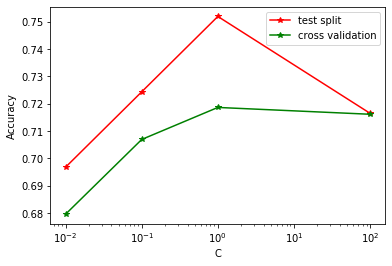

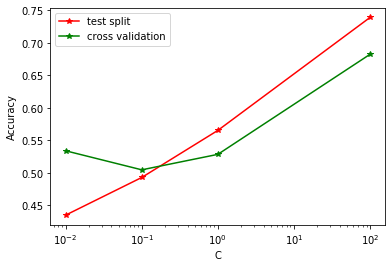

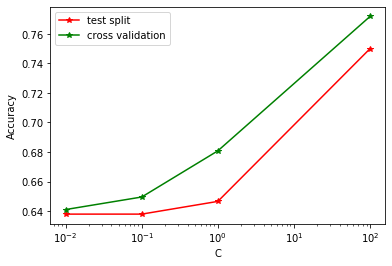

In [16]:
#plot for a range of C values
C = [0.01,0.1,1,100]
datasets = [diabetes, sonar, ionosphere]


for data in datasets:
    plt.figure()
    split_acc = []
    cv_acc = []
    for c in C:
        _, test_acc, cross_val, _ = svm_classification(data, C = c, kernel='poly', degree=5)
        split_acc.append(test_acc)
        cv_acc.append(cross_val)
    plt.plot(C,split_acc,'r*-', label = 'test split')
    plt.plot(C,cv_acc,'g*-', label = 'cross validation')
    plt.xscale('log')
    plt.legend()
    plt.xlabel('C')
    plt.ylabel('Accuracy')